In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py

In [4]:
cd D:\Biometrics_HW2

D:\Biometrics_HW2


In [23]:
## import file
frame = pd.read_excel('values_4000.xlsx', index_col =0)

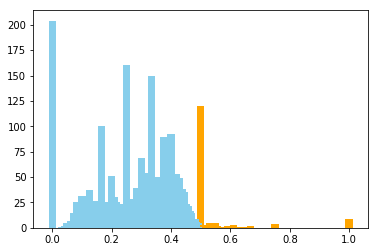

In [13]:
##plot distribution graphs

m=[frame[a][b] for a in frame.columns for b in frame .index if a==b]
n=[frame[a][b] for a in frame.columns for b in frame .index if a!=b]
from collections import Counter
xa=Counter(m)
ya=Counter(n)


x1=[i[0] for i in xa.items() if py.isnan(i[0])==False]
y1=[i[1] for i in xa.items() if py.isnan(i[0])==False]
color1 = ['orange' if i[0]>=0.5 else 'skyblue' for i in xa.items() if py.isnan(i[0])==False]
plt.bar(x1,y1,width=0.02, color = color1)
x2=[i[0] for i in ya.items() if py.isnan(i[0])==False]
y2=[i[1] for i in ya.items() if py.isnan(i[0])==False]
color2 = ['orange' if i[0]>=0.5 else 'skyblue' for i in ya.items() if py.isnan(i[0])==False]
plt.bar(x2,y2,width=0.025,color = color2)
plt.show()


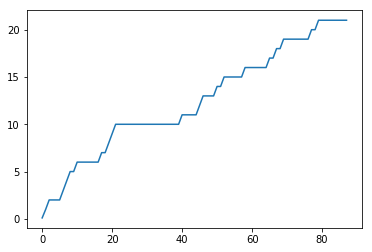

In [7]:
## plot CMC graphs

ads=[a for a in frame.columns for b in frame.index if a==b]
re={}
for ad in ads:
    row=[a for a in frame[:][ad]]
    for i in range(88):
        if frame[ad][ad] in row[:i]:
            re[i]=re.get(i,0)+1

x=list(re.keys())
y=list(re.values())
x.insert(0,0)
y.insert(0,0.1)
plt.plot(x,y)
plt.show()



In [8]:
def tmr(a,th):
    count=0
    for i in a:
        if i<=th:
            count +=1
    return count/(len(a)*1.0)
        
    

In [9]:
def fmr(b,th):
    count=0
    for i in b:
        if i<=th:
            count +=1
    return count/(len(b)*1.0)

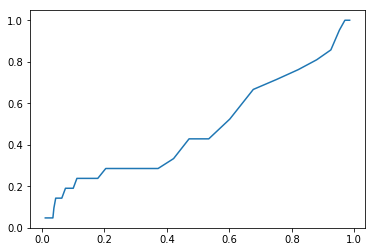

In [10]:
##plot ROC graphs

m=[frame[a][b] for a in frame.columns for b in frame .index if a==b]
n=[frame[a][b] for a in frame.columns for b in frame .index if a!=b]
re_a = [tmr(m,i) for i in py.arange(0,1,0.01)]
re_b=[fmr(n,i) for i in py.arange(0,1,0.01)]
plt.plot(re_b,re_a)

plt.show()